### Here we get parameters needed for LAMMPS simulation

In [1]:
import numpy as np
from pandas import read_csv

# from average_atom.core.average_atom_new import AverageAtom as AA
from average_atom.core.aa_types import AverageAtomFactory
from average_atom.core.misc import jacobi_relaxation, sor
from average_atom.core.grids import NonUniformGrid
from average_atom.core.physics import ThomasFermi, FermiDirac

import matplotlib.pyplot as plt

from hnc.hnc.constants import *
from hnc.hnc.misc import rs_from_n, n_from_rs

plt.rcParams.update({'font.size': 10})
plt.rcParams["figure.figsize"] = (5,3.5)
plt.rcParams["figure.dpi"] = 200
plt.rcParams['xtick.labelsize']=14
plt.rcParams.update({'font.size': 12, 'font.family': 'serif'})
plt.rcParams['legend.fontsize'] = 8

color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

ModuleNotFoundError: No module named 'mendeleev'


In [8]:
# Aluminum
name='Al'
Z, A = 13, 26.981538 

ρ_solid = 2.699 #g/cc, the solid density of aluminum 
ρ = ρ_solid#8.1 # g/cc
ni_cc = ρ/(A*amu_to_AU*AU_to_g)
ni_AU = ni_cc*invcc_to_AU
rs = rs_from_n(ni_AU)

R  = 10*rs

Ti_eV = 1 
Te_eV = 3

#

Te_AU = Te_eV*eV_to_AU
Ti_AU = Ti_eV*eV_to_AU


aa_ZJ  = AverageAtomFactory.create_model("ZJ_ISModel", Z, A, Ti_AU, Te_AU, rs, R, name=name, ignore_vxc=False, xc_type='KSDT', Npoints=2000, rmin=1e-4, N_stencil_oneside = 2)
aa_CS  = AverageAtomFactory.create_model("TFStarret2014", Z, A, Ti_AU, Te_AU, rs, R, name=name, ignore_vxc=False, Npoints=2000, rmin=1e-4, N_stencil_oneside = 2)

________________________
Generating NPA
T:  0.11024797619388696
Using More TF fit for initial Zstar = 2.594
	Intializing grid
Initializing, True
Initializing
	Creating Integral Equation Solver
Intialized Potentials and Densities
Initialized
________________________
Generating NPA
T:  0.11024797619388696
Using More TF fit for initial Zstar = 2.594
	Intializing grid
Initializing, False
________________________
Generating NPA
T:  0.11024797619388696
Using More TF fit for initial Zstar = 2.594
	Intializing grid
Initializing, True
Initializing
	Creating Integral Equation Solver
Intialized Potentials and Densities
Initialized


In [9]:
aa_ZJ.solve()

__________________________________________
TF Iteration 279
	μ = 2.665750745e-01, change: 0.000000000e+00 (converged=True)
	φe Err =  6.036e-11, φe change =  3.616e-11
	ne Err =  8.516e-11, ne change =  2.374e-14
	Q =  7.687e-07 ->  7.695e-07, 
	Zstar guess =  2.594e+00. Current Zstar:  2.594e+00 (converged=True)
	Change =  3.719e-11


/home/zach/plasma/average_atom/core/physics.py:142: RuntimeWarning: overflow encountered in exp
  f_fd = lambda q: 1/(1 + np.exp( 1/Te*(q**2/2 - μ ) ))
/home/zach/plasma/average_atom/core/average_atom_new.py:478: RuntimeWarning: divide by zero encountered in divide
  rel_errs = (np.abs(A @ φe - b)[:-1]/b[:-1])


	-------------------
	Solving IET.
0: Initial condition Total Error: 4.259e+02
Exiting status 0, reverting to best index so far: 2103
Final iter:2104, Total Error: 9.886e-13


In [10]:
aa_CS.solve()

Solving core.
__________________________________________
TF Iteration 83
	μ = 2.665752305e-01, change: 1.575517494e-12 (converged=True)
	φe Err =  5.834e-11, φe change =  5.063e-12
	ne Err =  5.272e-12, ne change =  7.499e-16
	Q = -9.568e-10 -> -7.509e-10, 
	Zstar guess =  2.594e+00. Current Zstar:  1.808e+00 (converged=False)
	Change =  3.701e-12
Settin up and solving empty atom
________________________
Generating NPA
T:  0.11024797619388696
	Intializing grid
Initializing, True
Initializing
	Creating Integral Equation Solver
Intialized Potentials and Densities
Initialized
__________________________________________
TF Iteration 115
	μ = 2.665752305e-01, change: 0.000000000e+00 (converged=True)
	φe Err =  6.532e-06, φe change =  9.062e-11
	ne Err =  3.019e-11, ne change =  5.845e-11
	Q =  1.299e+01 ->  1.299e+01, 
	Zstar guess =  1.808e+00. Current Zstar:  1.808e+00 (converged=True)
	Change =  8.016e-11
Check combination is neutral: 13 = 1.299e+01
	Creating Integral Equation Solver
	---

/home/zach/plasma/average_atom/core/aa_types.py:154: RuntimeWarning: invalid value encountered in power
  self.Uei_iet   = self.iet.FT_k_2_r(self.Uei_iet_k**self.rs**-3)


Exiting status 0, reverting to best index so far: 1711
Final iter:1712, Total Error: 9.883e-13


## LAMMPS inputs

###### mass = grams/mole (amu, so 1.0072766 for proton)
###### distance = Angstroms
###### time = picoseconds
###### energy = eV
###### velocity = Angstroms/picosecond
###### force = eV/Angstrom
###### torque = eV
###### temperature = Kelvin
###### pressure = bars
###### dynamic viscosity = Poise
###### charge = multiple of electron charge (1.0 is a proton)
###### dipole = charge*Angstroms
###### electric field = volts/Angstrom
###### density = gram/cm^dim

In [13]:
aa = aa_CS

aa_Yukawa  = AverageAtomFactory.create_model("ZJ_ISModel", Z, A, Ti_AU, Te_AU, rs, R, name=name, Zstar_init = aa.Zstar)
aa_Yukawa.iet.HNC_solve(tol=1e-12)

________________________
Generating NPA
T:  0.11024797619388696
	Intializing grid
Initializing, True
Initializing
	Creating Integral Equation Solver
Intialized Potentials and Densities
Initialized
0: Initial condition Total Error: 3.720e+02
Exiting status 1, reverting to best index so far: 1001
Final iter:1001, Total Error: 1.167e-08


1

In [14]:
N = 10000

L_Angstroms = (N/ni_AU)**(1/3) * AU_to_Angstrom
κ_inverse_Angstroms = aa.κ/rs / AU_to_Angstrom
r_cutoff_Angstroms = 10 * 1/κ_inverse_Angstroms
Zsquare_eV_Angstrom = aa.Zstar**2 * AU_to_eV * AU_to_Angstrom
T_K = aa.Ti * AU_to_K
ωi = np.sqrt(4*π*ni_AU*aa.Zstar**2/(m_p*A))
dt_ps = 0.005 * 1/ωi * AU_to_s*1e12

print(f"pair_style yukawa {κ_inverse_Angstroms:0.4e} {r_cutoff_Angstroms:0.4e} # pair_style yukawa kappa cutoff")
print(f"region simulation_box block 0 {L_Angstroms:0.6f} 0 {L_Angstroms:0.6f} 0 {L_Angstroms:0.6f} # region simulation_box block x0 x1 y0 y1 z0 z1")
print(f"mass 1 {A*m_p*AU_to_amu:0.7f}  # Setting ion mass")
print(f"pair_coeff 1 1 {Zsquare_eV_Angstrom} {r_cutoff_Angstroms:0.4e} # pair_coeff id id A cutoff, u = A/r e^-rκ")
print(f"velocity ion create {T_K:0.6f} 12345 mom yes rot no dist gaussian")
print(f"timestep {dt_ps:0.3e}  # dt  ")
print(f"fix myNVT all nvt temp {T_K:0.6f} {T_K:0.6f} $(5.0*dt)")



pair_style yukawa 1.8379e+00 5.4411e+00 # pair_style yukawa kappa cutoff
region simulation_box block 0 54.958850 0 54.958850 0 54.958850 # region simulation_box block x0 x1 y0 y1 z0 z1
mass 1 27.1778683  # Setting ion mass
pair_coeff 1 1 120.19717696921113 5.4411e+00 # pair_coeff id id A cutoff, u = A/r e^-rκ
velocity ion create 11604.525006 12345 mom yes rot no dist gaussian
timestep 2.782e-05  # dt  
fix myNVT all nvt temp 11604.525006 11604.525006 $(5.0*dt)


In [30]:
import pandas as pd
import numpy as np

def read_rdf_pandas(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()

    positions = None
    all_gr = []
    all_coordination = []
    num_bins = 0
    
    for i, line in enumerate(lines):
        if line.startswith('#'):
            continue  # Skip comment lines
        
        parts = line.split()
        if len(parts) == 2:  # This is a timestep header with the number of rows (bins)
            timestep = int(parts[0])
            num_bins = int(parts[1])
            # Skip the next num_bins lines after reading the current block
            block = lines[i+1:i+1+num_bins]
            block_data = pd.DataFrame([list(map(float, l.split())) for l in block],
                                      columns=['Row', 'Position', 'g(r)', 'Coordination'])
            if positions is None:
                positions = block_data['Position'].values
            all_gr.append(block_data['g(r)'].values)
            all_coordination.append(block_data['Coordination'].values)
    
    all_gr = np.array(all_gr)
    all_coordination = np.array(all_coordination)
    
    return positions, all_gr, all_coordination

# Usage
filename = '/home/zach/Downloads/rdf.dat'
r_array, g_r_list, _ = read_rdf_pandas(filename)


### LAMMPS Output Yukawa

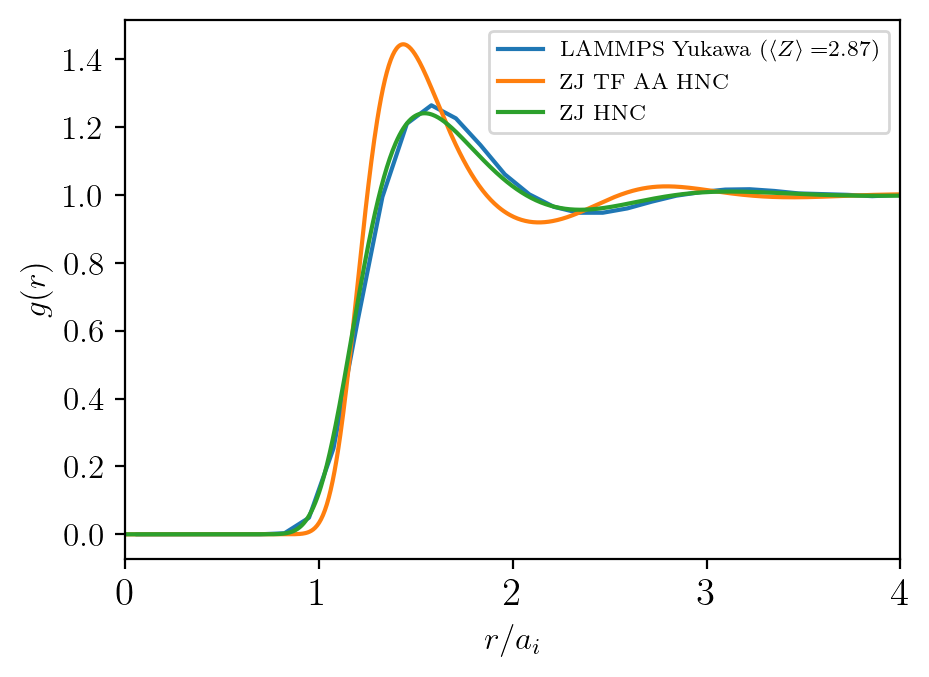

In [128]:
fig, ax = plt.subplots()

ax.plot(r_array*Angstrom_to_AU/rs, np.mean(g_r_list, axis=0), label=r"LAMMPS Yukawa ($\langle Z \rangle=${0:.2f})".format(aa.Zstar))
ax.plot(aa_ZJ.iet.r_array, aa_ZJ.iet.h_r_matrix[0,0]+1, label="ZJ TF AA HNC ")
ax.plot(aa_Yukawa.iet.r_array, aa_Yukawa.iet.h_r_matrix[0,0]+1, label="ZJ HNC ")


ax.set_xlim(0,4)
ax.set_ylabel(r"$g(r)$")
ax.set_xlabel(r"$r/a_i$")
ax.legend()

D = [26.94784303 42.93396861 52.15149627 56.22341365 59.53886412 62.27618428
 63.01940964 66.39924643 69.8002534  71.86025794 73.32150476 76.47818394
 80.86896259 81.43097262] [A^2/ps]
D = [0.00269478 0.0042934  0.00521515 0.00562234 0.00595389 0.00622762
 0.00630194 0.00663992 0.00698003 0.00718603 0.00733215 0.00764782
 0.0080869  0.0081431 ] [cm^2/s]


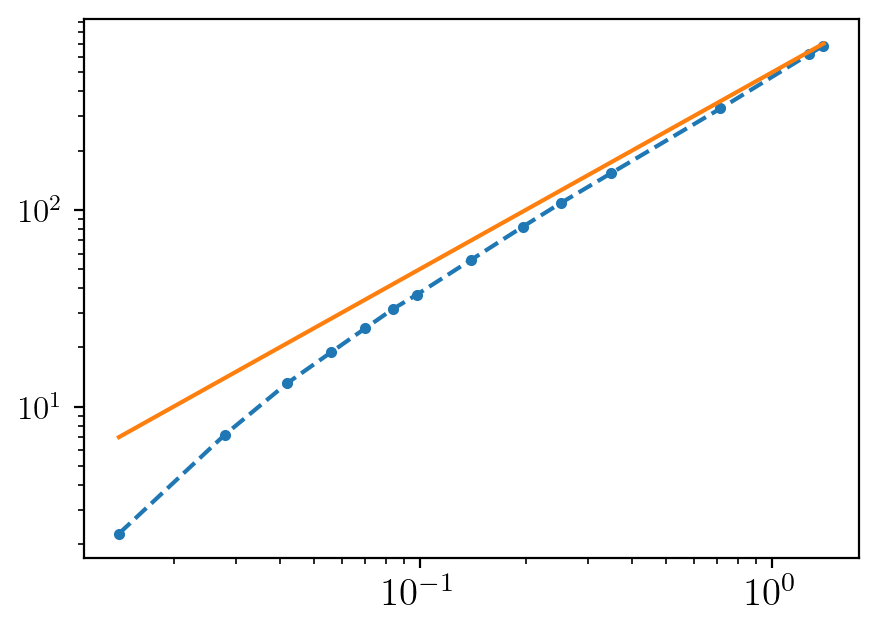

In [172]:
ts = np.array([ 0.014000003, 0.028000003, 0.042000003, 0.056000003, 0.070000003, 0.084000003, 0.098000003,0.14, 0.196,0.252, 0.35, 0.714, 1.274, 1.4])
msds = np.array([2.2636193   , 7.2129075   , 13.142178   , 18.891068 , 25.006324, 31.387198, 37.055414 ,55.775367,  82.085098,108.65271, 153.97516, 327.63254, 618.16235, 684.02017 ])
D_A2_per_ps =  msds/(6*ts)
print(f"D = {D_A2_per_ps} [A^2/ps]")
print(f"D = {D_A2_per_ps*(Angstrom_to_AU*AU_to_cm)**2/1e-12} [cm^2/s]")
fig, ax = plt.subplots()
ax.plot(ts, msds,'--.')
ax.plot(ts, ts*500)
ax.set_yscale('log')
ax.set_xscale('log')

#### LAMMPS Tabulated 

In [20]:
from pandas import read_csv
from scipy.interpolate import interp1d

ti, te = 1, 10
fix_factor = 1/10

def load_NS_u_data(filename, fix_factor=1):
    NS_aa = read_csv(filename, skiprows=8, delim_whitespace=True, names=["r", "uii","dvdr"])
    return NS_aa.r, NS_aa.uii*fix_factor
NS_folder = "/home/zach/plasma/average_atom/data/aluminum_2T/aluminum_2T_NS/"
u_KS_raw = load_NS_u_data(NS_folder + f"qm_ksdt_aluminum_ti{ti}ev_t{te}ev_d2.7gpcc/qm_potential_for_md.jerome.dat")

u_KS_interp = interp1d(u_KS_raw[0], u_KS_raw[1]*fix_factor, kind='cubic')
min_r, cutoff_r =  u_KS_raw[0][0], 20
N_PP_table = 5000
r_lammps_AU = np.linspace(min_r, cutoff_r, num = N_PP_table)
u_KS_lammps = u_KS_interp(r_lammps_AU)*AU_to_eV
F_KS_raw = -np.gradient(u_KS_raw[1]*fix_factor, u_KS_raw[0])
r_lammps =  r_lammps_AU * AU_to_Angstrom
F_KS_lammps = interp1d(u_KS_raw[0]*AU_to_Angstrom, F_KS_raw*AU_to_eV/AU_to_Angstrom, kind='cubic' )(r_lammps)

from datetime import datetime
date = datetime.today().strftime('%Y-%m-%d')

header = f"#DATE: {date}  UNITS: metal  CONTRIBUTOR: Zachary Johnson, Nathaniel Shaffer, Charlie Starrett\n\nAL_PP\nN {N_PP_table}\n" 
np.savetxt(f"uii_KS_Te{te}eV_Ti{ti}eV.table", np.array([np.arange(0,len(r_lammps))+1, r_lammps, u_KS_lammps, F_KS_lammps]).T, fmt='%d %.6e %.6e %.6e', header=header, comments='')

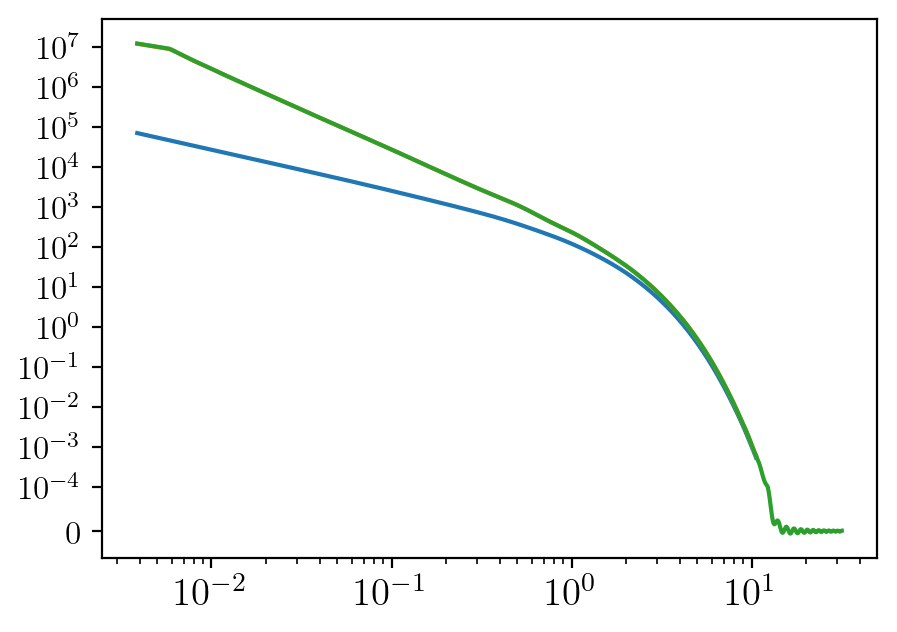

In [248]:
fig, ax = plt.subplots()

ax.plot(r_lammps, u_KS_lammps)
ax.plot(r_lammps, F_KS_lammps)
ax.plot(u_KS_raw[0]*AU_to_Angstrom, F_KS_raw*AU_to_eV/AU_to_Angstrom)
ax.set_yscale('symlog', linthresh=1e-4)
ax.set_xscale('log')

In [236]:
from datetime import datetime
date = datetime.today().strftime('%Y-%m-%d')

header = f"#DATE: {date}  UNITS: metal  CONTRIBUTOR: Zachary Johnson, Nathaniel Shaffer, Charlie Starrett\n\nAL_PP\nN {N_PP_table}\n" 
np.savetxt("uii_KS_Te1eV_Ti1eV.table", np.array([np.arange(0,len(r_lammps))+1, r_lammps, u_KS_lammps, F_KS_lammps]).T, fmt='%d %.6e %.6e %.6e', header=header, comments='')

#### DIFFUSION PLOT

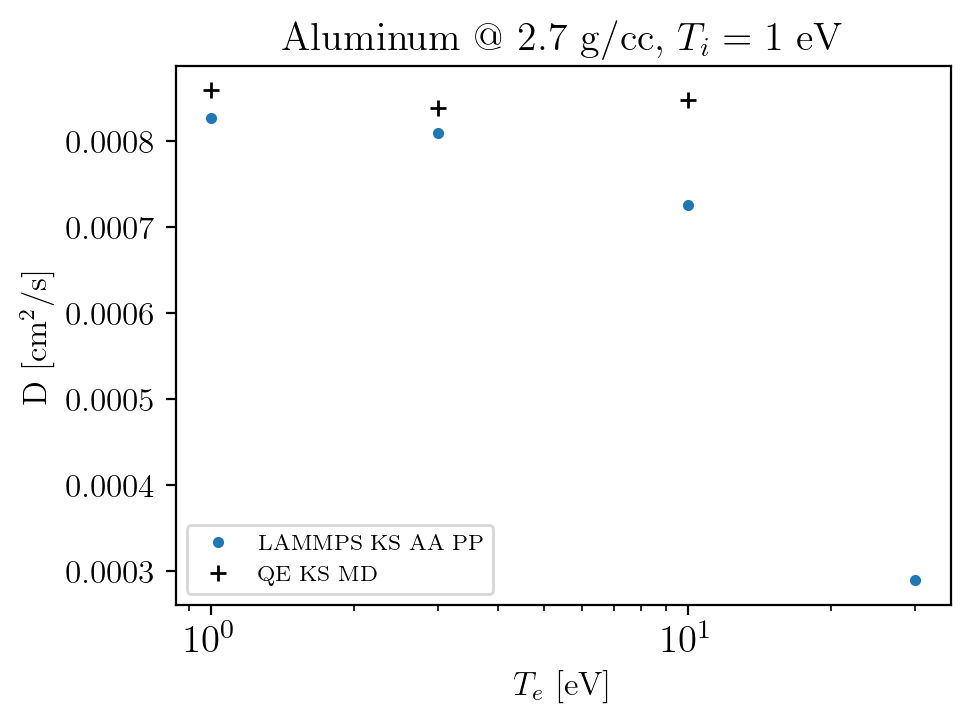

In [49]:
fig, ax = plt.subplots()
ax.set_title(r"Aluminum @ $2.7$ g/cc, $T_i = 1 $ eV")#, fontsize=8)

AA_Te_list = [1,3,10,30]
QE_Te_list = [1,3,10]

LAMMPS_D_cm2_invs = [0.000826305885773093, 0.000809308711207357, 0.000725267325403338, 0.000288831779966189 ]
QE_D_cm2_invs = [0.00085860, 0.00083826, 0.00084694]

ax.plot(AA_Te_list, LAMMPS_D_cm2_invs, '.',label="LAMMPS KS AA PP")
ax.plot(QE_Te_list, QE_D_cm2_invs,'k+', label="QE KS MD")

ax.set_xlabel(r"$T_e$ [eV]")
ax.set_ylabel("D [cm$^2$/s]")
ax.set_xscale('log')

ax.legend()


In [50]:

def load_NS_g_data(filename):
    NS_aa = read_csv(filename, skiprows=4, delim_whitespace=True, names=["r", "g"])
    return NS_aa.r, NS_aa.g
NS_folder = "/home/zach/plasma/average_atom/data/aluminum_2T/aluminum_2T_NS/"
u_KS_raw = load_NS_u_data(NS_folder + f"qm_ksdt_aluminum_ti{ti}ev_t{te}ev_d2.7gpcc/qm_potential_for_md.jerome.dat")

NS_ks_g11 = load_NS_g_data(NS_folder + "qm_ksdt_aluminum_ti1ev_t1ev_d2.7gpcc/qm_ii_pdfs.dat")
NS_ks_g12 = load_NS_g_data(NS_folder + "qm_ksdt_aluminum_ti1ev_t3ev_d2.7gpcc/qm_ii_pdfs.dat")
NS_ks_g13 = load_NS_g_data(NS_folder + "qm_ksdt_aluminum_ti1ev_t10ev_d2.7gpcc/qm_ii_pdfs.dat")
NS_ks_g14 = load_NS_g_data(NS_folder + "qm_ksdt_aluminum_ti1ev_t30ev_d2.7gpcc/qm_ii_pdfs.dat")

# Usage
lammps_folder = "/home/zach/plasma/average_atom/data/aluminum_2T/LAMMPS/"
r_array, g_r_list, _ = read_rdf_pandas(lammps_folder + "outputei1eV1eV/rdf.dat")
LAMMPS_ks_g11 = [r_array*Angstrom_to_AU, np.mean(g_r_list, axis=0)]
r_array, g_r_list, _ = read_rdf_pandas(lammps_folder + "outputei3eV1eV/rdf.dat")
LAMMPS_ks_g12 = [r_array*Angstrom_to_AU, np.mean(g_r_list, axis=0)]
r_array, g_r_list, _ = read_rdf_pandas(lammps_folder + "outputei10eV1eV/rdf.dat")
LAMMPS_ks_g13 = [r_array*Angstrom_to_AU, np.mean(g_r_list, axis=0)]
r_array, g_r_list, _ = read_rdf_pandas(lammps_folder + "outputei30eV1eV/rdf.dat")
LAMMPS_ks_g14 = [r_array*Angstrom_to_AU, np.mean(g_r_list, axis=0)]



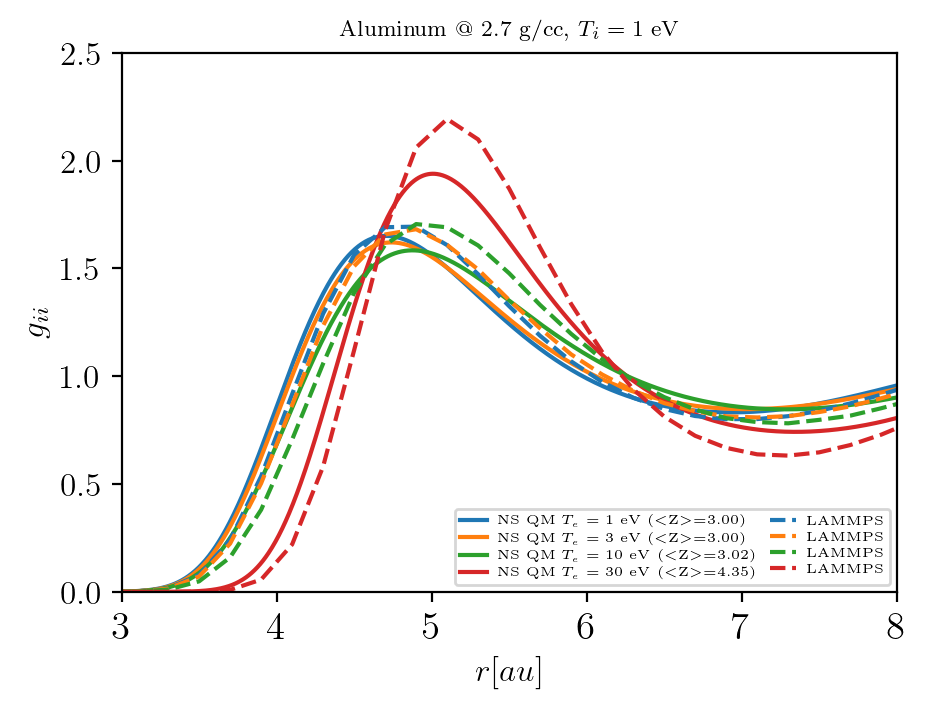

In [51]:
def plot_gii(gii_data, figax = None, **kwargs):#line = None, color=None, label=None):
    if figax is None:
        fig, ax = plt.subplots()
    else:
        fig, ax  = figax
    
    ax.plot(gii_data[0], gii_data[1], **kwargs )#, linestyle=line, color=color, label=label)
    
    ax.set_xlim(0,15)
    ax.set_xlim(3,8)
    ax.set_ylim(0,2.5)
    
    ax.set_ylabel(r"$g_{ii}$")
    ax.set_xlabel(r"$r [au]$")
    
    ax.legend(fontsize=4.8, ncols=2, labelspacing=0.3, columnspacing=1)
    
# Fixed Ti
fig, ax = plt.subplots()
ax.set_title(r"Aluminum @ $2.7$ g/cc, $T_i = 1 $ eV", fontsize=8)

plot_gii(NS_ks_g11, figax = (fig, ax), color=color_cycle[0], linestyle='-', label=r"NS QM $T_e=1$ eV (<Z>=3.00)")
plot_gii(NS_ks_g12, figax = (fig, ax), color=color_cycle[1], linestyle='-', label=r"NS QM $T_e=3$ eV (<Z>=3.00)")
plot_gii(NS_ks_g13, figax = (fig, ax), color=color_cycle[2], linestyle='-', label=r"NS QM $T_e=10$ eV (<Z>=3.02)")
plot_gii(NS_ks_g14, figax = (fig, ax), color=color_cycle[3], linestyle='-', label=r"NS QM $T_e=30$ eV (<Z>=4.35)")

plot_gii(LAMMPS_ks_g11, figax = (fig, ax), color=color_cycle[0], linestyle='--', label=r"LAMMPS ")
plot_gii(LAMMPS_ks_g12, figax = (fig, ax), color=color_cycle[1], linestyle='--', label=r"LAMMPS ")
plot_gii(LAMMPS_ks_g13, figax = (fig, ax), color=color_cycle[2], linestyle='--', label=r"LAMMPS ")
plot_gii(LAMMPS_ks_g14, figax = (fig, ax), color=color_cycle[3], linestyle='--', label=r"LAMMPS ")

plt.savefig("KS_AlTi1eV_NS_comparison.png", dpi=200)